# AS4501 Astroinformática - Tarea 1

## How much rain is too much

---

### Estudiante: Andrés Calderón

#### Pregunta Q1.1

Librerías a utilizar:

In [ ]:
%pip install numpy scipy astropy pandas matplotlib emcee xlrd openpyxl

Importamos los dataframes:

In [2]:
import pandas as pd

hr_colorado = pd.read_csv("data/330077_HR.csv")
hr_serena = pd.read_csv("data/290004_HR.csv")
hr_calama = pd.read_csv("data/220002_HR.csv")
hr_tobalaba = pd.read_csv("data/330019_HR.csv")

Graficamos la función de densidad de probabilidad para cada zona

- Primero creamos la función de Gauss a graficar:

In [31]:
import numpy as np

def gauss(x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

- Luego definimos una función para obtener los valores de A, $\mu$ y $\sigma$ usando los datos disponibles, para después graficarlos:

In [71]:
from matplotlib import pyplot as plt
# from scipy import stats
%matplotlib inline

"""
def plot_pdf(df, name):
    # non-parametric pdf
    nparam_density = stats.gaussian_kde(df["HR"])
    x = np.linspace(0, 100, 100)
    nparam_density = nparam_density(x)

    # parametric fit
    loc_param, scale_param = stats.norm.fit(df["HR"])
    param_density = stats.norm.pdf(x, loc=loc_param, scale=scale_param)

    # plots
    fig, ax = plt.subplots(figsize=(7, 5))
    ax.hist(df["HR"], bins=30, density=True)
    ax.plot(x, nparam_density, 'r-', label='non-parametric density (smoothed by Gaussian kernel)')
    ax.plot(x, param_density, 'k--', label='parametric density')
    ax.set_ylim([0, 0.05])
    ax.set_title(f"Probability density function for the HR in {name}")
    ax.set_xlabel("HR")
    ax.set_ylabel("Probability")
    ax.legend(loc='best')
"""

def plot_pdf(df, name, data, upper=100, desc="", bins=50):
    x = np.linspace(0, upper, 100)
    mu = df[data].mean()
    sigma = df[data].var()**(.5)
    A = 1 / (sigma * (2 * np.pi)**(.5))

    plt.figure(figsize=(6,4))

    plt.hist(df[data], bins=bins, density=True) #* histograma de los datos
    plt.plot(x, gauss(x, A, mu, sigma), color='red')
    plt.title(f"Distribution of the {desc}{data} in {name}")
    plt.xlabel(f"{data}")
    plt.ylabel("Frequency")

    plt.show()

- Finalmente graficamos la distribución de HR para las distintas estaciones:

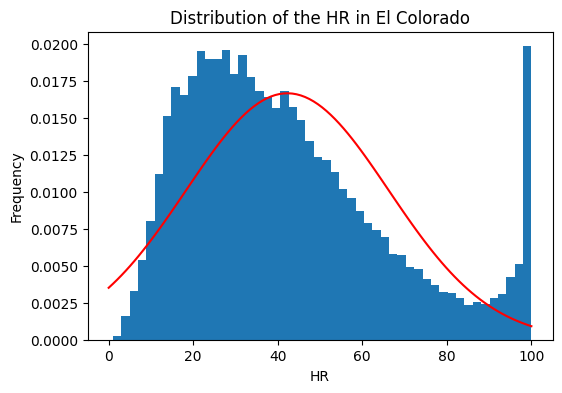

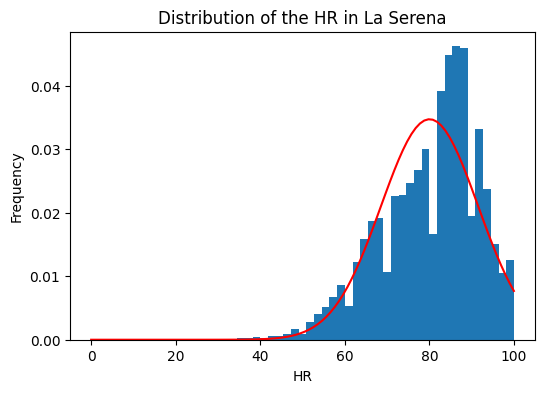

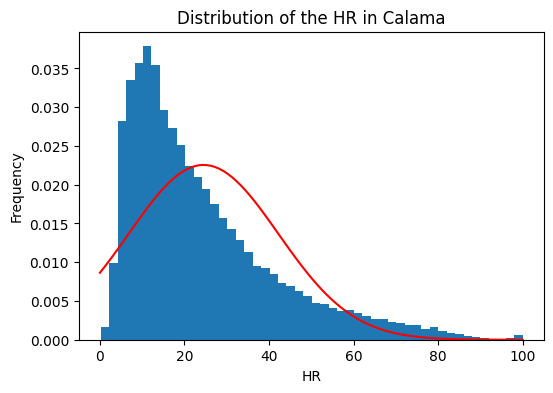

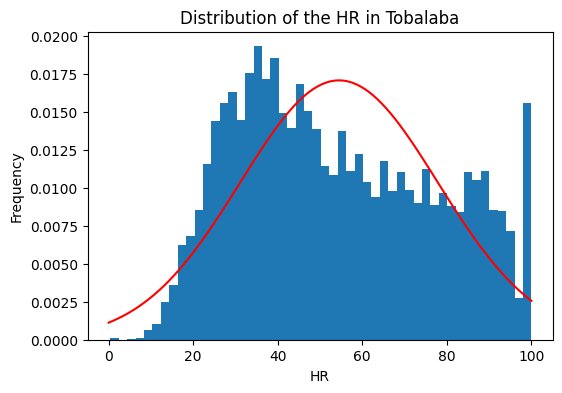

In [49]:
plot_pdf(hr_colorado, "El Colorado", "HR")
plot_pdf(hr_serena, "La Serena", "HR")
plot_pdf(hr_calama, "Calama", "HR")
plot_pdf(hr_tobalaba, "Tobalaba", "HR")

#### Pregunta Q1.2

Usaremos los datos disponibles en la estación de Quinta Normal desde 2012 hasta la fecha y los graficaremos para comparar:

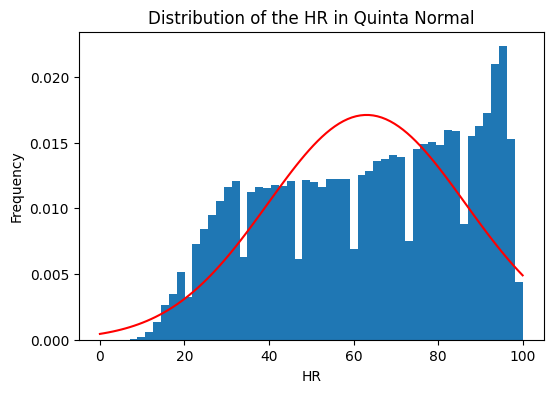

In [64]:
hr_quinta_normal = pd.read_csv("data/330020_HR.csv")

plot_pdf(hr_quinta_normal, "Quinta Normal", "HR")

Esta distribución es más parecida a la de Tobalaba, lo cual hace sentido pues son lugares bastante cercanos.

#### Pregunta Q2.1

Primero importamos los datos que se nos piden (para este caso se eligió la estación de Quinta Normal nuevamente dado que estas lluvias afectaron principalmente a la zona centro del país), y luego mostramos información estadística relevante sobre este suceso:

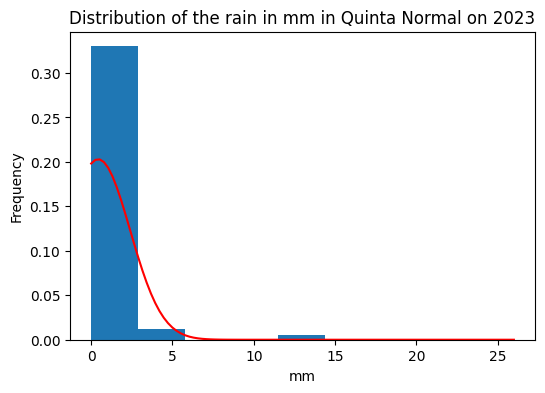

,mm
count,120.000000
mean,0.432500
std,1.965123
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,14.400000


In [84]:
rain_2023 = pd.read_csv("data/mm_june_2023.csv")

plot_pdf(rain_2023, "Quinta Normal on 2023", "mm", 26, "rain in ", 5)
rain_2023.describe()

#### Pregunta Q2.2

Y ahora hacemos lo mismo con datos de lluvias ocurridas en esta estación durante junio de los últimos 5 años:

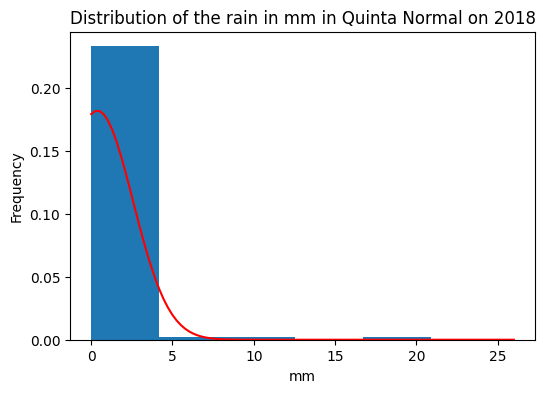

,mm
count,120.000000
mean,0.381667
std,2.190046
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,20.900000


In [89]:
rain_2018 = pd.read_csv("data/mm_june_2018.csv")
plot_pdf(rain_2018, "Quinta Normal on 2018", "mm", 26, "rain in ", 5)
rain_2018.describe()

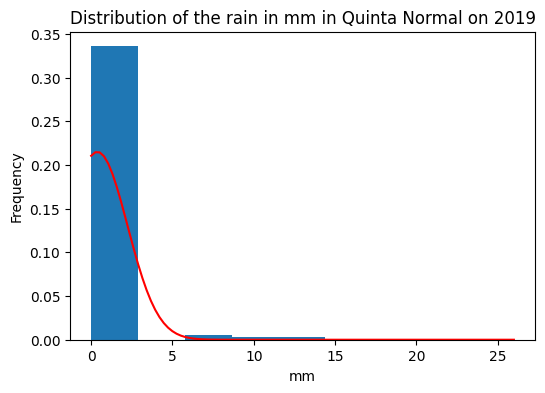

,mm
count,120.000000
mean,0.382500
std,1.855478
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,14.400000


In [90]:
rain_2019 = pd.read_csv("data/mm_june_2019.csv")
plot_pdf(rain_2019, "Quinta Normal on 2019", "mm", 26, "rain in ", 5)
rain_2019.describe()

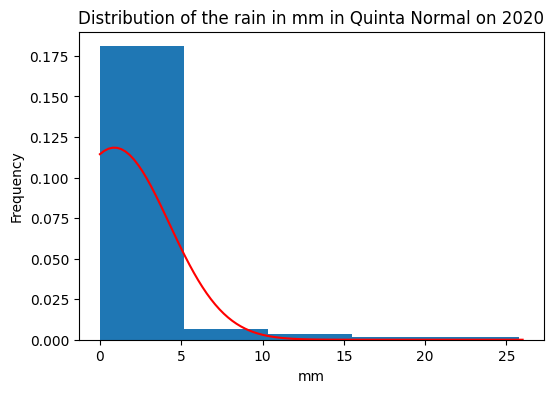

,mm
count,120.000000
mean,0.889167
std,3.367437
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,25.800000


In [91]:
rain_2020 = pd.read_csv("data/mm_june_2020.csv")
plot_pdf(rain_2020, "Quinta Normal on 2020", "mm", 26, "rain in ", 5)
rain_2020.describe()

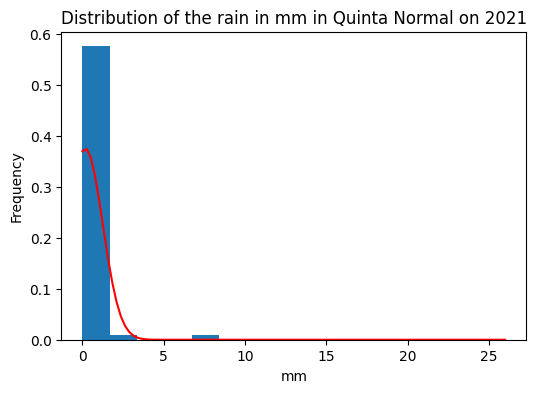

,mm
count,120.000000
mean,0.185000
std,1.063264
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,8.400000


In [92]:
rain_2021 = pd.read_csv("data/mm_june_2021.csv")
plot_pdf(rain_2021, "Quinta Normal on 2021", "mm", 26, "rain in ", 5)
rain_2021.describe()

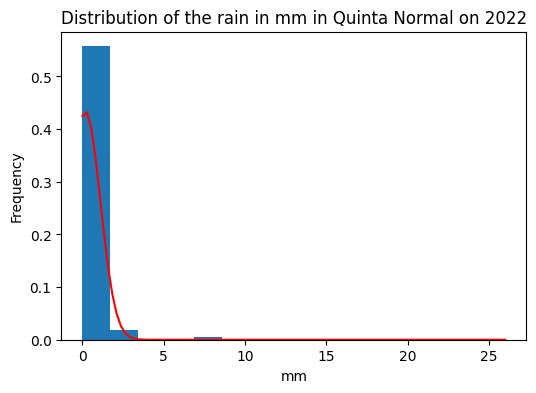

,mm
count,120.000000
mean,0.188333
std,0.919918
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,8.600000


In [93]:
rain_2022 = pd.read_csv("data/mm_june_2022.csv")
plot_pdf(rain_2022, "Quinta Normal on 2022", "mm", 26, "rain in ", 5)
rain_2022.describe()

Para medir la desviación utilizaremos el método de Z-score, para lo cual usaremos como muestra de datos los promedios de milímetros de agua caída en junio por año como nuestra muestra de datos, es decir:

229/600 1067/1200 113/600 2951/7200

$ \mu = \frac{0.4325 + 0.381\overline6 + 0.3825 + 0.8891\overline6 + 0.185 + 0.188\overline3}{6} = \frac{2951}{7200} = 0.40986\overline1  $

$ \sigma \approx 0.235027 $

$ \Rightarrow z = \frac{0.4325 - \mu}{\sigma} \approx 0.0963246 $

Este valor es cercano a 0 por lo que indica que no es uno muy desviado de lo normal, al menos considerando la muestra representativa que se eligió.